{'Tree_6': {'f_Q_3_12': 1416, 'f_Q_0_7': 1, 'f_Q_2_9': 659, 'f_Q_1_1': 13, 'f_Q_3_2': 1481, 'f_Q_5_11': 150097, 'f_Q_3_6': 9840, 'f_Q_1_2': 21, 'f_Q_4_8': 20248, 'f_Q_3_11': 9259, 'f_Q_4_3': 13156, 'f_Q_0_5': 1, 'f_Q_4_6': 44728, 'f_Q_4_2': 73455, 'f_Q_1_10': 82, 'f_Q_2_3': 401, 'f_Q_4_12': 41104, 'f_Q_0_14': 2, 'f_Q_2_8': 864, 'f_Q_4_11': 73655, 'f_Q_4_13': 33552, 'f_Q_2_5': 704, 'f_Q_4_1': 61770, 'f_Q_1_12': 25, 'f_Q_2_4': 684, 'f_Q_0_4': 4, 'f_Q_3_13': 7419, 'f_Q_3_9': 9712, 'f_Q_5_4': 360532, 'f_Q_1_4': 18, 'f_Q_0_13': 3, 'f_Q_1_6': 64, 'f_Q_5_10': 318156, 'f_Q_3_3': 1183, 'f_Q_2_1': 121, 'f_Q_5_3': 110830, 'f_Q_5_5': 205469, 'f_Q_4_10': 32691, 'f_Q_1_3': 11, 'f_Q_2_11': 228, 'f_Q_1_5': 85, 'f_Q_5_6': 158232, 'f_Q_1_7': 13, 'f_Q_5_1': 636050, 'f_Q_3_1': 1521, 'f_Q_0_6': 8, 'f_Q_2_6': 151, 'f_Q_5_12': 110830, 'f_Q_3_8': 2549, 'f_Q_5_7': 360041, 'f_Q_2_2': 589, 'f_Q_3_4': 2351, 'f_Q_2_13': 457, 'f_Q_1_9': 14, 'f_Q_3_10': 4726, 'f_Q_0_2': 2, 'f_Q_3_7': 7207, 'f_Q_5_9': 130096, 'f_Q_0_

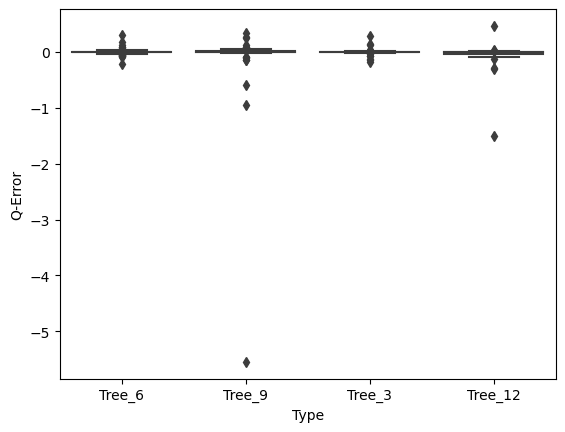

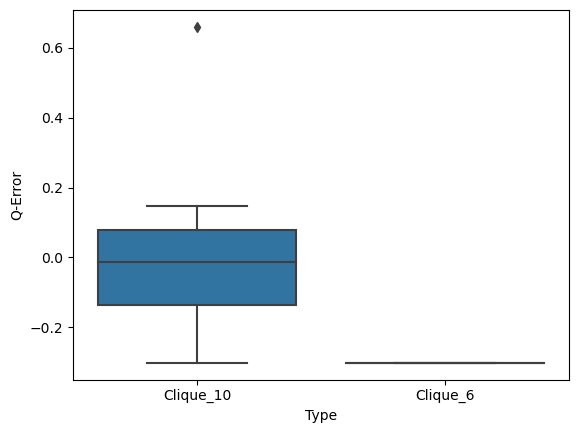

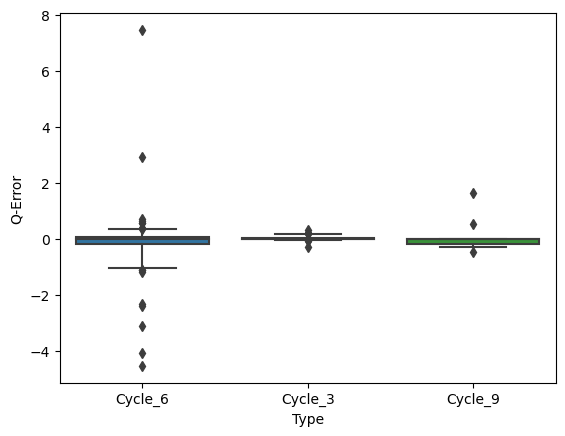

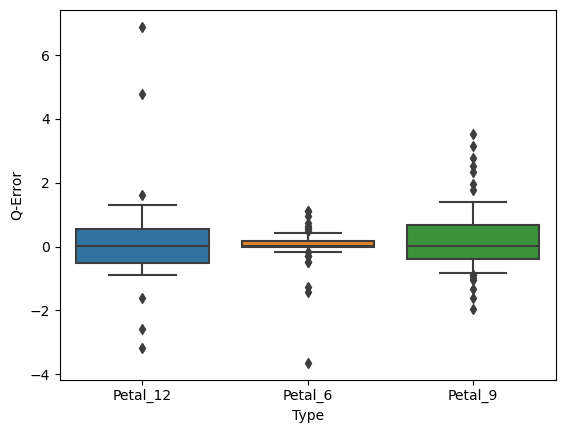

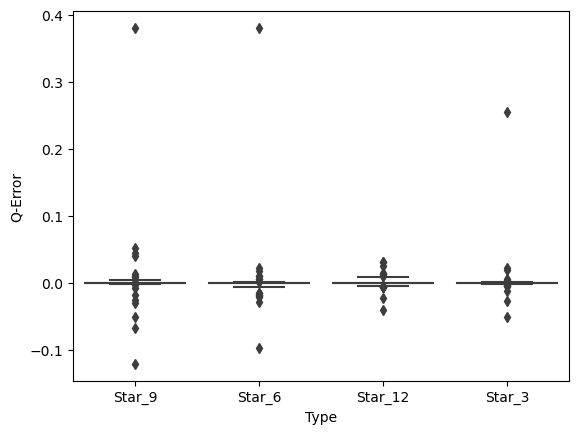

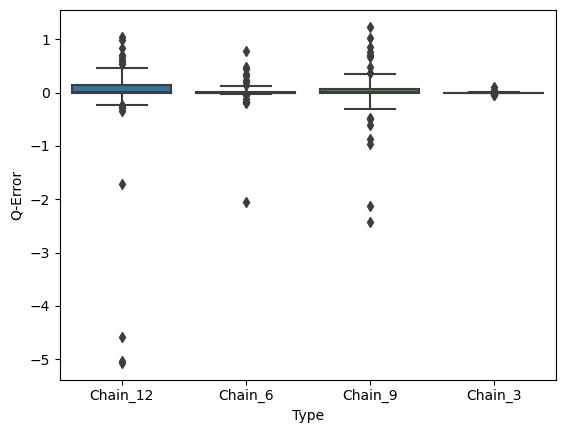

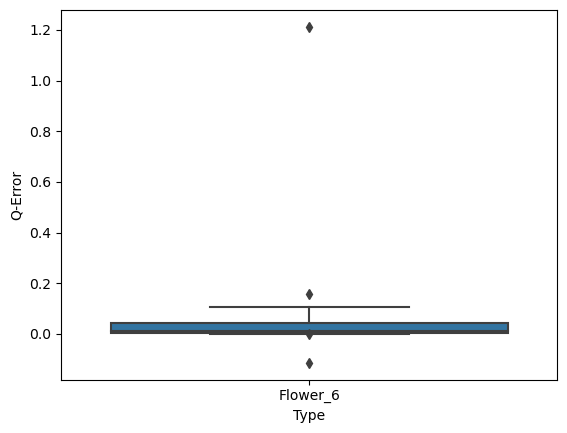

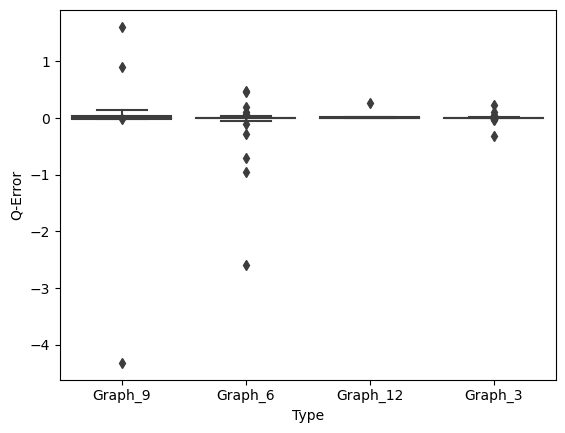

Chain_12
f_Q_4_14 61345 49011 0.09748560703082987
f_Q_3_12 2923 2961 -0.005609592031862842
f_Q_0_7 0 1 0.0
f_Q_2_9 115 102 0.05209766859169429
f_Q_1_1 42 32 0.11809931207799451
f_Q_3_2 4381 5784 -0.12065503110829878
f_Q_5_11 1382423 846674 0.21292472725994838
f_Q_3_6 1317 1615 -0.08858675170533781
f_Q_1_2 90 90 0.0
f_Q_4_8 24143 30558 -0.10233369217817412
f_Q_3_11 1324 1330 -0.001963655863404856
f_Q_4_3 37150 34688 0.029779557574319604
f_Q_0_5 3 2 0.17609125905568124
f_Q_4_6 156807 39195 0.6021347772791676
f_Q_4_2 31915 20724 0.18752126515074075
f_Q_1_10 14 14 0.0
f_Q_2_3 501 499 0.0017371802438561623
f_Q_4_12 85078 73776 0.061902167150221565
f_Q_2_8 363 362 0.0011980545029466327
f_Q_4_11 115889 67664 0.23368454757390555
f_Q_4_13 48792 28900 0.22745077759309673
f_Q_2_5 167 168 -0.0025928105782795363
f_Q_4_1 80425 79665 0.004123509099189349
f_Q_1_12 30 36 -0.07918124604762489
f_Q_2_4 304 676 -0.34707311233288207
f_Q_0_4 1 1 0.0
f_Q_3_13 2130 2130 0.0
f_Q_3_9 1409 1357 0.0163311454496195

In [2]:
import os
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt

dataset = 'yago'
true_card_dir = '../data/true_cardinality/{}/'.format(dataset)
esti_file = '../data/result/step2/{}_alley_p0.001_s0_query_result.txt'.format(dataset)

# read true cards
# true_card = {'Tree_3':{'f_Q_0_0':1, ...}, ...}
true_card = {}
for dirpath, dirnames, filenames in os.walk(true_card_dir):
    if len(filenames) == 0:
        continue
    type = os.path.basename(dirpath)
    file_card = {}
    for file in filenames:
        name = os.path.splitext(file)[0]
        path = os.path.join(dirpath, file)
        file_card[name] = int(open(path).read().strip())
    true_card[type] = file_card
print(true_card)

# read estimations
# esti = {'Tree_3':{'f_Q_0_0':1, ...}, ...}
esti = {}
with open(esti_file) as f:
    lines = f.readlines()
    for line in lines:
        line = line.strip()
        tokens = line.split(' ')
        if len(tokens) != 4:
            continue
        path = tokens[0]
        directory_path, filename = os.path.split(path)
        type = os.path.basename(directory_path)
        name = os.path.splitext(filename)[0]
        card = int(float(tokens[1]))
        if type not in esti:
            esti[type] = {}
        esti[type][name] = card
print(esti)

# q-error
# q_error = {'Tree_3':{'f_Q_0_0':1, ...}, ...}
q_error = {}
for type in esti:
    q_error[type] = {}
    for name in esti[type]:
        q_error[type][name] = math.log10(max(esti[type][name], 1)) - math.log10(true_card[type][name])
print(q_error)

# convert q-error to pandas dataframe
datas = {}
for type, queries in q_error.items():
    for query, error in queries.items():
        big_type = type.split('_')[0]
        if big_type not in datas:
            datas[big_type] = []
        datas[big_type].append((type, error))

# Create DataFrames
dataframes = []
for type, data in datas.items():
    dataframes.append(pd.DataFrame(data, columns=['Type', 'Q-Error']))

# plot q-error as boxplot
for df in dataframes:
    sns.boxplot(x='Type', y='Q-Error', data=df, whis=[10, 90])
    plt.show()

# After visualizing the results of the boxplot, we find the result of Chain_12 contains lots of variance.
# Print out all Chain_12's q-error
for type in esti:
    if 'Chain_12' in type:
        print(type)
        for name in esti[type]:
            print(name, esti[type][name], true_card[type][name], q_error[type][name])
        print()

# Tree_9 
# f_Q_5_4 352044
# Chain_12
# f_Q_5_3 582574
# f_Q_5_6 351852
# f_Q_5_7 107500
# f_Q_4_7 38594

In [9]:
# split the dataset into two files: vertex file and edge file
# vertex file: ID,LABEL
# edge file: FROM,TO,LABEL

dataset = 'yago'
dataset_file = '../data/dataset/{}/{}.txt'.format(dataset, dataset)
vertices_file = '../data/dataset/{}/{}_vertices.csv'.format(dataset, dataset)
edges_file = '../data/dataset/{}/{}_edges.csv'.format(dataset, dataset)

# readin the dataset
v = open(vertices_file, 'w', buffering=1073741824)
e = open(edges_file, 'w', buffering=1073741824)

with open(dataset_file) as f:
    lines = f.readlines()
    for line in lines:
        line = line.strip().split(' ')
        if line[0] == 'v':
            vertex_line = line[1]
            for i in range(2, len(line)):
                vertex_line += ',' + line[i]
            v.write(vertex_line + '\n')
        elif line[0] == 'e':
            edge_line = line[1]
            for i in range(2, len(line)):
                edge_line += ',' + line[i]
            e.write(edge_line + '\n')
        elif line[0] == 't':
            pass
        else:
            raise ValueError('Invalid line: {}'.format(line))

v.close()
e.close()

In [ ]:
# convert a query file to the format of "(a)->(b),(b)->(c),(c)->(d)"
# Or with labels: "(a:person)-[friendof]->(b:person), (b:person)-[likes]->(c:movie)"
